# Part A

# Read Dataset

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
data = pd.read_csv("./wfp_market_food_prices.csv", sep=',')
data.head(n=7)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
5,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,6,2014,50.0,WFP
6,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,7,2014,50.0,WFP


# Meanings of Each Column

* adm0_id: country id
* adm0_name: country name
* adm1_id: locality id
* adm1_name: locality name
* mkt_id: market id
* mkt_name: market name
* cm_id: commodity purchase id
* cm_name: commodity purchased
* cur_id: currency id
* cur_name: name of currency
* pt_id: market type id
* pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
* um_id: measurement id
* um_name: unit of goods measurement
* mp_month: month recorded
* mp_year: year recorded 
* mp_price: price paid
* mp_commoditysource: Source supplying price information

----------------------------------
## I. Data Cleaning

**Pose a question: How to know food prices situation in a country by analyzing the dataset?**

### 1. Check Missing Values

In [3]:
data.apply(lambda x: sum(x.isnull()),axis=0)

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64

In [4]:
# data backup
data_bak = data.copy()

In [5]:
#drop rows with missing values
data_bak.dropna(inplace=True)

In [6]:
# check if row with missing value has been removed
data_bak.isnull().sum()

adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64

### 2. Check  inappropraite values in the dataset

In [7]:
data_bak.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,729965.000000,729965.000000,729965.000000,729965.000000,729965.000000,729965.000000,729965.000000,729965.000000,729965.000000,7.299650e+05
mean,860.524409,18005.919580,888.111248,160.927520,57.259937,14.930860,10.500401,6.378896,2012.507628,4.234829e+03
std,6379.306857,82078.325302,540.712015,117.931311,23.135316,0.277758,13.126298,3.434346,3.675369,5.600542e+04
min,1.000000,272.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,0.000000e+00
25%,115.000000,1577.000000,380.000000,67.000000,29.000000,15.000000,5.000000,3.000000,2011.000000,3.100000e+01
50%,170.000000,2208.000000,911.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.778750e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.062000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


In [8]:
# get amounts of rows of different country
data_bak['adm0_name'].value_counts()

Rwanda                              115037
India                                65864
Niger                                36195
Mali                                 32702
Democratic Republic of the Congo     29997
Zambia                               26374
Ukraine                              24766
Senegal                              22783
Mozambique                           22652
Gambia                               21575
Syrian Arab Republic                 21310
Tajikistan                           19679
Kyrgyzstan                           18466
Philippines                          18115
Lebanon                              15942
Lao People's Democratic Republic     15436
Malawi                               15104
Myanmar                              14601
Nigeria                              10406
Ethiopia                              9604
Yemen                                 9105
Burkina Faso                          8783
Colombia                              8296
Ghana      

So, if we want to know more details about **Rwanda**:

In [9]:
#get data about Rwanda
data_Rwanda = data_bak.loc[data_bak['adm0_name'] == 'Rwanda']
#get amounts of different food in Rwanda
data_Rwanda['cm_name'].value_counts()

Beans (dry)                   4357
Sweet potatoes                4353
Maize flour                   4330
Potatoes (Irish)              4320
Cassava flour                 4275
Sorghum                       4099
Maize                         4024
Passion fruit                 4014
Bananas                       3691
Eggplants                     3597
Peppers (green)               3168
Sorghum flour                 3080
Cassava                       2766
Charcoal                      2759
Meat (beef)                   2624
Rice                          2563
Papaya                        2248
Avocados                      2213
Wheat flour                   2187
Cabbage                       2148
Onions (red)                  2147
Tomatoes                      2147
Carrots                       2114
Mangoes                       2113
Livestock (Goat)              2112
Eggs                          2077
Rice (imported, Indian)       1995
Groundnuts (shelled)          1976
Rice (imported, Tanz

Then, for example, we want to know more about banana's price:

In [10]:
# get data which related to 'Maize'
data_Bananas_Rwanda = data_Rwanda.loc[data_Rwanda['cm_name'] == 'Bananas']
data_Bananas_Rwanda

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
467194,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,11,2010,199.5000,MINAGRI
467195,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,12,2010,216.0000,MINAGRI
467196,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,1,2011,168.0000,MINAGRI
467197,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,2,2011,178.0000,MINAGRI
467198,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,3,2011,127.8000,MINAGRI
467199,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,4,2011,114.0000,MINAGRI
467200,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,5,2011,127.6000,MINAGRI
467201,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,6,2011,170.0000,MINAGRI
467202,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,7,2011,140.5000,MINAGRI
467203,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,8,2011,148.8000,MINAGRI


-----------------------
## II. How is the data distributed?

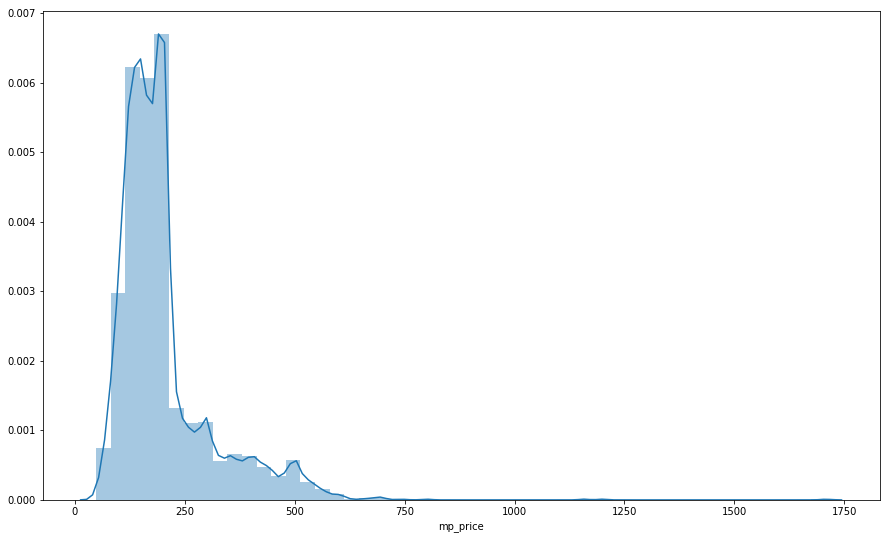

In [11]:
# distribution of bananas' price per kg
sns.distplot(data_Bananas_Rwanda['mp_price'])

The distribution of bananas' price per kg looks like a Normal Distribution.

## III. Summary statistics

In [12]:
data_Bananas_Rwanda.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
467194,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,11,2010,199.5,MINAGRI
467195,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,12,2010,216.0,MINAGRI
467196,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,1,2011,168.0,MINAGRI
467197,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,2,2011,178.0,MINAGRI
467198,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,254,Bananas,77,RWF,15,Retail,5,KG,3,2011,127.8,MINAGRI


In [13]:
data_Bananas_Rwanda.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,3691.0,3691.000000,3691.000000,3691.0,3691.0,3691.0,3691.0,3691.000000,3691.000000,3691.000000
mean,205.0,20190.983202,1147.201842,254.0,77.0,15.0,5.0,6.649688,2012.636413,202.659983
std,0.0,5599.092505,152.457890,0.0,0.0,0.0,0.0,3.437244,1.798680,109.944700
min,205.0,2587.000000,1045.000000,254.0,77.0,15.0,5.0,1.000000,2008.000000,48.250000
25%,205.0,21969.000000,1062.000000,254.0,77.0,15.0,5.0,4.000000,2011.000000,135.000000
50%,205.0,21971.000000,1085.000000,254.0,77.0,15.0,5.0,7.000000,2013.000000,176.600000
75%,205.0,21973.000000,1106.000000,254.0,77.0,15.0,5.0,10.000000,2014.000000,212.250000
max,205.0,21973.000000,1562.000000,254.0,77.0,15.0,5.0,12.000000,2015.000000,1708.500000


In [14]:
data_Bananas_Rwanda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3691 entries, 467194 to 580772
Data columns (total 18 columns):
adm0_id               3691 non-null int64
adm0_name             3691 non-null object
adm1_id               3691 non-null int64
adm1_name             3691 non-null object
mkt_id                3691 non-null int64
mkt_name              3691 non-null object
cm_id                 3691 non-null int64
cm_name               3691 non-null object
cur_id                3691 non-null int64
cur_name              3691 non-null object
pt_id                 3691 non-null int64
pt_name               3691 non-null object
um_id                 3691 non-null int64
um_name               3691 non-null object
mp_month              3691 non-null int64
mp_year               3691 non-null int64
mp_price              3691 non-null float64
mp_commoditysource    3691 non-null object
dtypes: float64(1), int64(9), object(8)
memory usage: 547.9+ KB


In [15]:
data_Bananas_Rwanda.shape

(3691, 18)

In [16]:
data_Bananas_Rwanda.mp_price.value_counts()

200.0000    361
150.0000     75
300.0000     60
100.0000     45
120.0000     44
250.0000     42
160.0000     37
180.0000     35
500.0000     32
165.0000     28
140.0000     27
400.0000     25
170.0000     23
195.0000     23
275.0000     23
190.0000     21
225.0000     20
350.0000     19
125.0000     19
130.0000     18
145.0000     17
175.0000     16
80.0000      16
110.0000     16
135.0000     15
155.0000     14
375.0000     14
115.0000     13
210.0000     13
325.0000     13
           ... 
171.4000      1
333.2000      1
344.8889      1
491.7500      1
437.2500      1
88.6000       1
137.7778      1
433.2000      1
223.6667      1
123.2000      1
128.4444      1
202.6000      1
201.2500      1
546.3333      1
435.5000      1
176.2500      1
675.0000      1
158.6250      1
199.7500      1
463.3333      1
242.8750      1
211.8000      1
288.6667      1
127.8571      1
98.3333       1
119.6000      1
198.9167      1
455.4000      1
221.4286      1
216.0000      1
Name: mp_price, Length: 

## IV. Outliers

Use Box-Plot to find outliers.

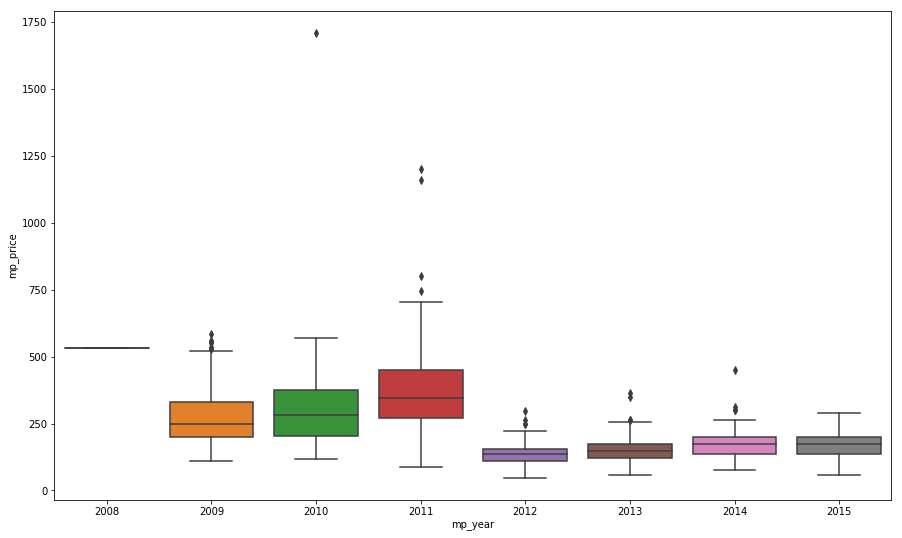

In [56]:
sns.boxplot(x = "mp_year", y = "mp_price", data = data_Bananas_Rwanda)

There are outliers among 2009 to 2014

## V. Plot

First, let's see the tendency of banana's price from 2008 to 2015.

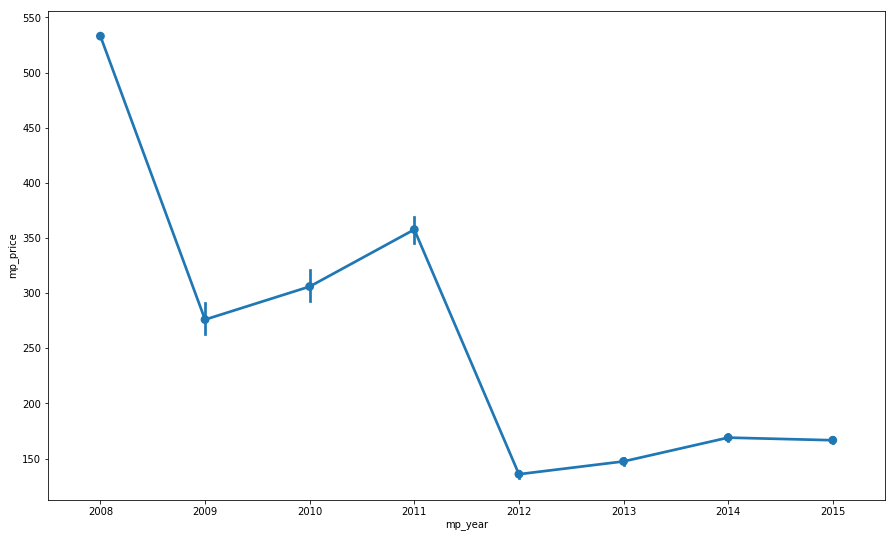

In [61]:
sns.pointplot(x = "mp_year", y = "mp_price", data = data_Bananas_Rwanda)

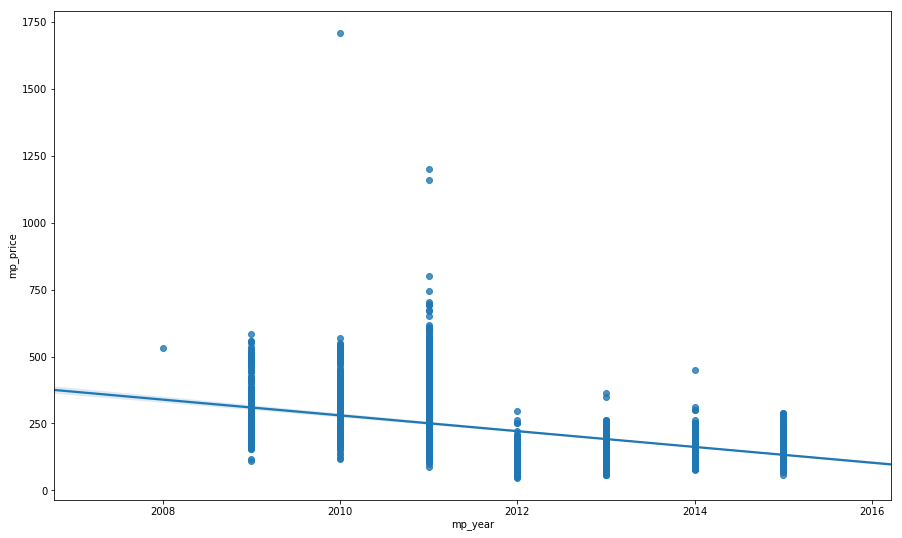

In [17]:
sns.regplot(x = "mp_year", y = "mp_price", data = data_Bananas_Rwanda)

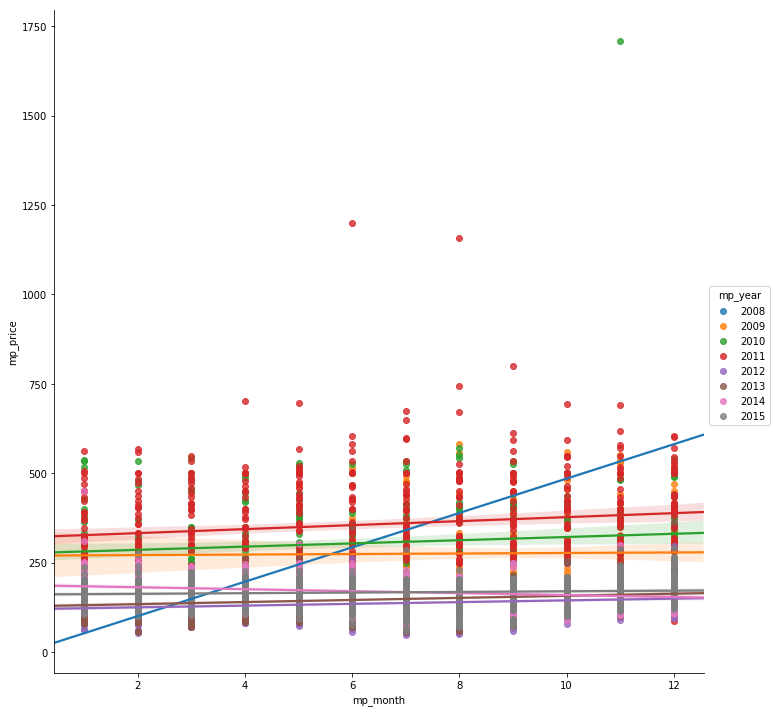

In [25]:
sns.lmplot(x = "mp_month", y = "mp_price", hue="mp_year", data = data_Bananas_Rwanda,size=10)

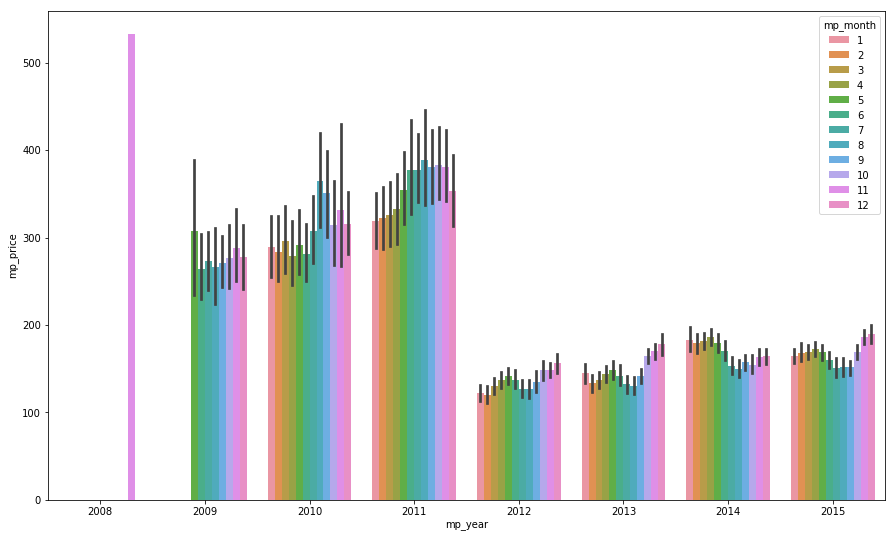

In [78]:
sns.barplot(x = "mp_year", y = "mp_price", hue = "mp_month", data = data_Bananas_Rwanda)

In [62]:
# get data in 2008 
data_Bananas_Rwanda.loc[data_Bananas_Rwanda['mp_year'] == 2008]

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
532934,205,Rwanda,2587,Kigali City/Umujyi wa Kigali,1091,Nyabugogo,254,Bananas,77,RWF,15,Retail,5,KG,11,2008,533.0,MINAGRI


Only 1 row about 2008. So the price analysis of 2008 is not inconclusive.
From 2009 to 2011, the bananas' unit-price rised. But when time came to 2012, the average price decreased more than 200. After 2012, the price kept on increasing in 3 years, modestly. 

And we can also tell that after 2012, the price is more steady.

# Are any of the columns correlated?

In [35]:
data_M_MF_Rwanda = data_Rwanda.loc[(data_Rwanda['cm_name'] == 'Maize')| (data_Rwanda['cm_name'] == 'Maize flour')]
data_M_MF_Rwanda

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
466046,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,11,2010,179.0000,MINAGRI
466047,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,12,2010,189.6667,MINAGRI
466048,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,1,2011,185.2500,MINAGRI
466049,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,2,2011,187.0000,MINAGRI
466050,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,3,2011,186.2000,MINAGRI
466051,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,4,2011,183.0000,MINAGRI
466052,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,5,2011,204.0000,MINAGRI
466053,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,6,2011,209.2500,MINAGRI
466054,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,7,2011,226.5000,MINAGRI
466055,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,51,Maize,77,RWF,15,Retail,5,KG,8,2011,213.2000,MINAGRI


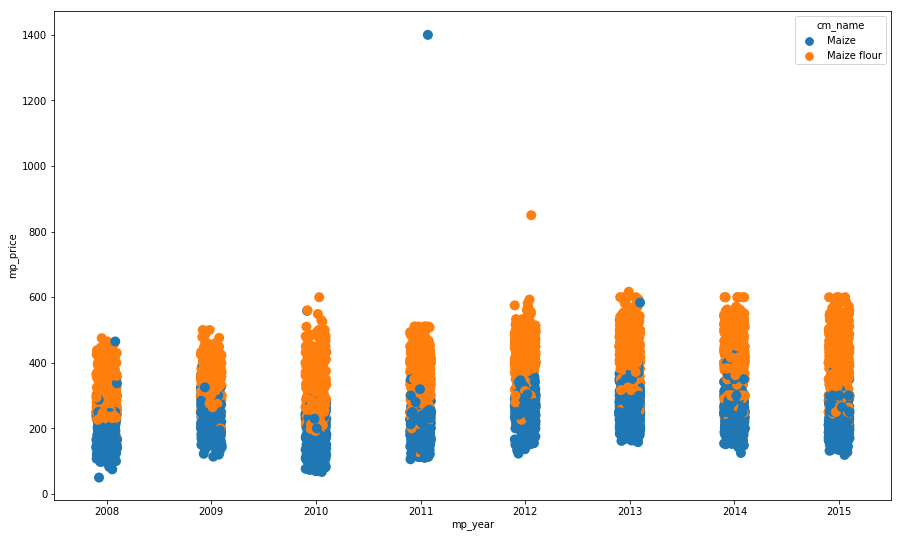

In [42]:
sns.stripplot(x = "mp_year", y = "mp_price", hue="cm_name", data = data_M_MF_Rwanda,size=10, jitter=True)

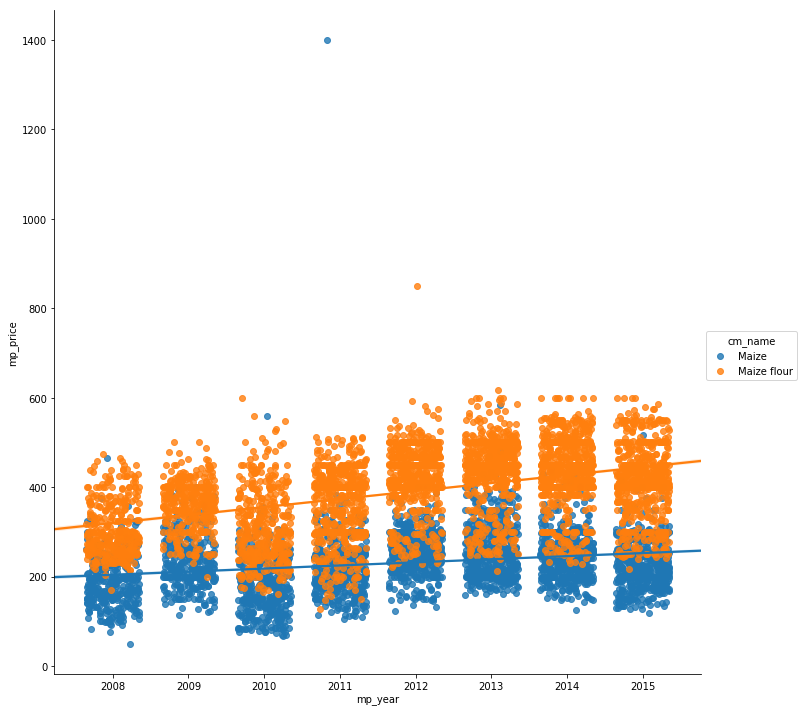

In [47]:
sns.lmplot(x = "mp_year", y = "mp_price", hue="cm_name",x_jitter=.35, data = data_M_MF_Rwanda,size=10)

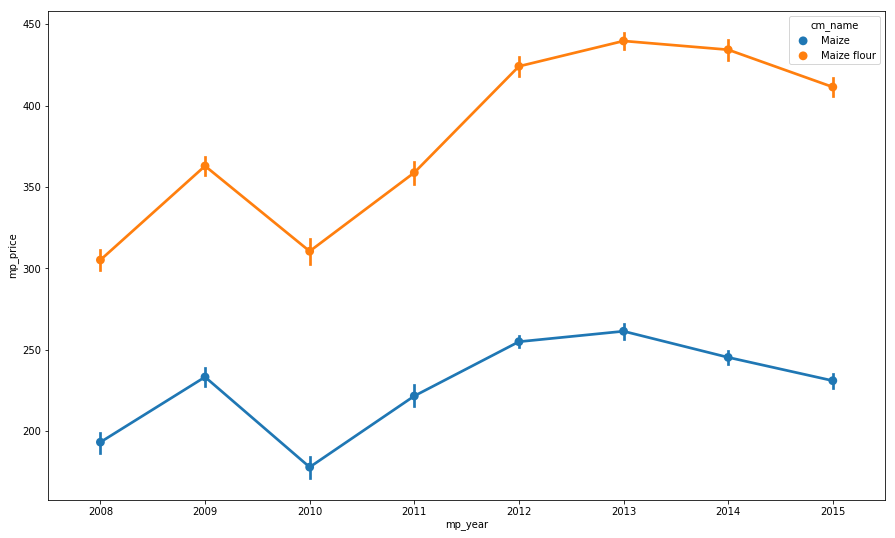

In [39]:
sns.pointplot(x = "mp_year", y = "mp_price", hue = "cm_name",data = data_M_MF_Rwanda)

As expected, the price of maize and maize flour are correlated, and the plot says these two kinds of food have a similar tendancy of unit-price.

- ----------------------------------
-- --
# Part B

In [10]:
from __future__ import print_function
import urllib3 #  pip install -i https://pypi.anaconda.org/pypi/simple urllib3
import unicodedata
from bs4 import BeautifulSoup, SoupStrainer, Comment
import warnings
warnings.filterwarnings('ignore')

In [11]:
url='http://searchstorage.techtarget.com/tip/How-to-use-REST-APIs-in-Python'

In [12]:
http = urllib3.PoolManager()
response = http.request('GET',url)
response.status 

200

In [13]:
soup=BeautifulSoup(response.data, "lxml")

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if gt IE 8]><!-->
<html class="no-js gt-ie8" dir="ltr" itemscope="" itemtype="http://schema.org/Article" lang="en" prefix="og: http://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   How to use REST APIs in Python
  </title>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="It's important for storage administrators who are after open management to know a little bit about using REST APIs in Python." name="description"/>
  <meta content="noodp" name="robots"/>
  <link href="http://searchstorage.techtarget.com/tip/How-to-use-REST-APIs-in-Python" rel="canonical"/>
  <meta content="How to use REST APIs in Python" property="og:title"/>
  <meta content="SearchStorage" property="og:site_name"/>
  <meta content="http://searchstorage.techtarget.com/tip/How-to-use-REST-APIs-in-Python" property="og:url"/>
  <meta content="It's important for stora

In [15]:
#Collect all of the external links 
links = soup.find_all('a')
links_http=[]
for each in links:
    if str(each.get('href'))[:4]=='http':  
        links_http.append(each)  
links_http

[<a class="header-logo mobile-link" href="http://www.techtarget.com/network">
 <span class="header-logo-mobile">SearchStorage</span>
 </a>,
 <a class="header-logo desktop-link" href="http://searchstorage.techtarget.com">
 <img alt="TechTarget" class="header-logo-desktop replace_2x" src="https://cdn.ttgtmedia.com/rms/ux/responsive/img/nav_logo.png"/>
 <img alt="TechTarget" class="header-logo-small replace_2x" src="https://cdn.ttgtmedia.com/rms/ux/responsive/img/nav_logo.png"/>
 </a>,
 <a class="nav-join-pro" href="https://users.techtarget.com/registration/searchStorage/LoginRegister.page"><span>Sign-up now. Start my free, unlimited access.</span></a>,
 <a href="https://users.techtarget.com/registration/searchStorage/LoginRegister.page"><span class="nav-user-action">Login</span></a>,
 <a class="register" href="https://users.techtarget.com/registration/searchStorage/Register.page"><span class="nav-user-action">Register</span></a>,
 <a href="http://www.techtarget.com/network">Techtarget Ne

In [16]:
# text of link
links_http_text = []
for link in links_http:
    links_http_text.append(link.text)
links_http_text

['\nSearchStorage\n',
 '\n\n\n',
 'Sign-up now. Start my free, unlimited access.',
 'Login',
 'Register',
 'Techtarget Network',
 'News',
 'Features',
 'Tips',
 'Answers',
 "Buyer's Guides",
 'Definitions',
 'Essential Guides',
 'Opinions',
 'Photo Stories',
 'Podcasts',
 'Quizzes',
 'Tutorials',
 'Sponsored Communities',
 'Storage Soup Blog',
 '\n\nSearchStorage\n',
 '\r\n\t\t\t\t\t\t\t\tCloud storage',
 ' Application storage',
 ' Flash memory',
 ' Object storage',
 ' Primary storage  devices',
 ' Software-defined storage',
 ' Solid-state storage',
 ' Storage management and analytics',
 ' Storage market research reports',
 ' Storage vendors',
 'All Topics',
 ' Cloud storage management and standards',
 ' Cloud storage gateways',
 ' Cloud storage management and standards',
 ' Hybrid cloud storage',
 ' Private cloud',
 ' Public cloud',
 'All Subtopics',
 '',
 '',
 '',
 '',
 'Get started',
 'Boto gains foothold as AWS SDK for Python standard',
 'Boto',
 'AWS SDKs match services to languag

In [17]:
# function to check whether a link is valid
def link_status(url):
    if str(url)[:4]=='http': 
        if  http.request('GET',url).status == 200:
            return True
        else:
            return False

In [48]:
temp={}
temp['a'] = 5

temp

{'a': 5}

In [49]:
# create a dict to store data
import datetime
link_data = []
for link in links_http:
    temp={}
#     temp.append(link['href'])
    temp['URL'] = link['href']
#     temp.append(link.text)
    temp['Text'] = link.text
#     temp.append(link_status(link['href']))
    temp['Valid'] = link_status(link['href'])
#     temp.append(datetime.datetime.now().strftime("%m-%d, %Y, %I:%M %p"))
    temp['Datetime'] = datetime.datetime.now().strftime("%m-%d, %Y, %I:%M %p")
    print(temp)
    link_data.append(temp)
link_data

{'URL': 'http://www.techtarget.com/network', 'Text': '\nSearchStorage\n', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'http://searchstorage.techtarget.com', 'Text': '\n\n\n', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'https://users.techtarget.com/registration/searchStorage/LoginRegister.page', 'Text': 'Sign-up now. Start my free, unlimited access.', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'https://users.techtarget.com/registration/searchStorage/LoginRegister.page', 'Text': 'Login', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'https://users.techtarget.com/registration/searchStorage/Register.page', 'Text': 'Register', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'http://www.techtarget.com/network', 'Text': 'Techtarget Network', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'URL': 'http://searchstorage.techtarget.com/info/news', 'Text': 'News', 'Valid': True, 'Datetime': '01-23, 2018, 12:55 AM'}
{'

{'URL': 'http://www.computerweekly.com/feature/Hot-skills-Python', 'Text': 'native Python', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchmicroservices.techtarget.com/tip/Support-for-RESTful-Web-Services-Part-1', 'Text': 'specify an action and an endpoint', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchsoftwarequality.techtarget.com/tip/Why-use-POST-vs-GET-to-keep-applications-secure', 'Text': 'PUT or POST method', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchaws.techtarget.com/definition/Boto', 'Text': 'Python SDK provided by Amazon', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchsecurity.techtarget.com/tip/Why-authorization-management-is-paramount-for-cybersecurity-readiness', 'Text': 'authentication and authorization scheme', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchaws.techtarget.com/feature/Book-excerpt-AWS-S3-tutorial-for-newbies', 'Tex

{'URL': 'http://searchstorage.techtarget.com/ezine/Storage-magazine/The-hottest-data-storage-technology-trends-for-2018', 'Text': 'The hottest data storage technology trends for 2018', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchstorage.techtarget.com/ehandbook/Manage-multiple-clouds-for-security-and-strong-data-backup', 'Text': 'Manage multiple clouds for security and strong data backup', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://www.techtarget.com/html/privacy_policy.html', 'Text': 'Privacy', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'https://www.google.com/adsense/support/bin/request.py?contact=abg_afc', 'Text': '-ADS BY GOOGLE', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchsolidstatestorage.techtarget.com', 'Text': '\nSearchSolidStateStorage', 'Valid': True, 'Datetime': '01-23, 2018, 12:56 AM'}
{'URL': 'http://searchsolidstatestorage.techtarget.com/opinion/Hybrid-and-AFA-storage-a

[{'Datetime': '01-23, 2018, 12:55 AM',
  'Text': '\nSearchStorage\n',
  'URL': 'http://www.techtarget.com/network',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': '\n\n\n',
  'URL': 'http://searchstorage.techtarget.com',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': 'Sign-up now. Start my free, unlimited access.',
  'URL': 'https://users.techtarget.com/registration/searchStorage/LoginRegister.page',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': 'Login',
  'URL': 'https://users.techtarget.com/registration/searchStorage/LoginRegister.page',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': 'Register',
  'URL': 'https://users.techtarget.com/registration/searchStorage/Register.page',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': 'Techtarget Network',
  'URL': 'http://www.techtarget.com/network',
  'Valid': True},
 {'Datetime': '01-23, 2018, 12:55 AM',
  'Text': 'News',
  'URL': 'http://searc

In [55]:
# output an csv file
import csv
# newline='', 使输出的excel没有多余空行
with open('output.csv', 'w',encoding='utf8',newline='') as csvfile:
    fieldnames = ['URL','Text','Valid','Datetime']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for each in link_data:
        writer.writerow(each)
    
